# Support Vector Regression

Se emplea el dataset diabetes, el cual se compone de 442 registros que tienen 10 atributos:

   * age - edad
   * sex - sexo
   * bmi - índice de masa corporal
   * bp - presión arterial media
   * s1 tc - colesterol sérico
   * s2 ldl - lipoproteínas de baja densidad
   * s3 hdl - lipoproteínas de alta densidad
   * s4 tch - colesterol total
   * s5 ltg - posiblemente logaritmo del nivel sérico de triglicéridos
   * s6 glu - nivel de azúcar en la sangre

La variable de salida es target


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.datasets import load_diabetes
X_wholed, y_wholed = load_diabetes(return_X_y=True, as_frame=True)

# EDA

Se queda como ejercicio realizar el EDA del dataset


    * Análisis de las variables de entrada
    * Verificar si existen nulos en el dataset
    * Correlación de las variables

# Preparación del dataset

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_wholed, y_wholed, test_size=0.2, random_state=0)

In [5]:
y_test.head()

,target
362,321.0
249,215.0
271,127.0
435,64.0
400,175.0


# Entrenar el modelo SVR

In [6]:
from sklearn.svm import SVR

## Kernel rbf

In [7]:
svr_reg_rbf = SVR()
svr_reg_rbf.fit(X_train, y_train)

SVR()

In [8]:
print(svr_reg_rbf.get_params())

{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [9]:
y_pred_rbf = svr_reg_rbf.predict(X_test)

## Kernel lineal

In [10]:
svr_reg_lin = SVR(kernel='linear')
svr_reg_lin.fit(X_train, y_train)

SVR(kernel='linear')

In [11]:
print(svr_reg_lin.get_params())

{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [12]:
y_pred_lin = svr_reg_lin.predict(X_test)

## Kernel polinomial (grado 2)

In [13]:
svr_reg_c = SVR(kernel='poly', degree=2)
svr_reg_c.fit(X_train, y_train)

SVR(degree=2, kernel='poly')

In [14]:
print(svr_reg_c.get_params())

{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 2, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [15]:
y_pred_c = svr_reg_c.predict(X_test)

## Kernel polinomial (grado 3)

In [16]:
svr_reg_t = SVR(kernel='poly')
svr_reg_t.fit(X_train, y_train)

SVR(kernel='poly')

In [17]:
print(svr_reg_t.get_params())

{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [18]:
y_pred_t = svr_reg_t.predict(X_test)

## RandomizedSearchCV

*RandomizedSearchCV* es útil cuando el número de hiperparámetros y su dimensionalidad son altas. Este método seleciona de manera aleatoria la combinación de los hiperparámetros, lo cual permite ahorrar tiempo y recursos en comparación del método exhaustivo *GridSearchCV*.

In [19]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'C': np.logspace(-3, 2, 6),
              'kernel': ['rbf', 'sigmoid', 'linear'],
              'gamma': ['scale', 'auto'] + list(np.logspace(-4, 1, 5)),
              'epsilon': [0.01, 0.1, 0.5]
              }

random_search = RandomizedSearchCV(
    estimator = SVR(),
    param_distributions = param_dist,
    n_iter = 20,
    cv = 5,
    scoring = 'neg_mean_squared_error',
    random_state = 1234,
    n_jobs = -1
)

_ = random_search.fit(X_train, y_train)

# Se asignan los resultados a un dataframe
resultados = pd.DataFrame(random_search.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False) \
    .head(5)

,param_kernel,param_gamma,param_epsilon,param_C,mean_test_score,std_test_score
17,sigmoid,10.0,0.10,100.0,-2963.164782,270.099975
13,rbf,scale,0.01,10.0,-3010.549865,230.130582
18,rbf,scale,0.01,100.0,-3054.011867,291.418828
8,sigmoid,10.0,0.01,10.0,-3242.772439,203.945623
9,rbf,scale,0.01,1.0,-5247.622536,528.825676


In [20]:
# Imprimir los mejores hiperparámetros después del tuneo
print(f'Mejores hiperparámetros {random_search.best_params_}\nAccuracy: {random_search.best_score_} {random_search.scoring}')

print(random_search.best_estimator_)

Mejores hiperparámetros {'kernel': 'sigmoid', 'gamma': np.float64(10.0), 'epsilon': 0.1, 'C': np.float64(100.0)}
Accuracy: -2963.164781956863 neg_mean_squared_error
SVR(C=np.float64(100.0), gamma=np.float64(10.0), kernel='sigmoid')


In [21]:
best_random = random_search.best_estimator_

In [22]:
y_pred_rand = best_random.predict(X_test)

# Gráfico de inferencias y resultados

Para observar los valores inferidos por el modelo, se va a gráficar la salida (Y) y la variable con la correlación más alta.



In [23]:
df = pd.concat([X_wholed, y_wholed], axis=1)
df_corr = df.corr()
df_corr.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


<Axes: >

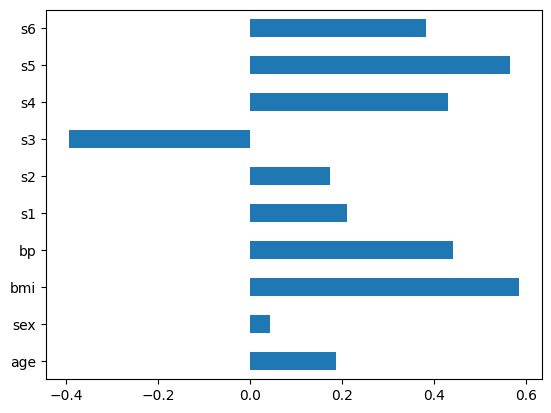

In [24]:
df_corr.drop(index=df_corr.index[-1], axis=0)["target"].plot.barh()

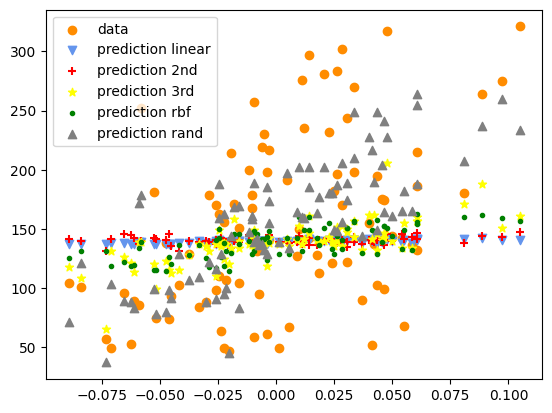

In [25]:
plt.scatter(X_test["bmi"], y_test, color='darkorange',  marker='o', label='data')
plt.scatter(X_test["bmi"], y_pred_lin, color='cornflowerblue',  marker='v', label='prediction linear')
plt.scatter(X_test["bmi"], y_pred_c, color='red',  marker='+', label='prediction 2nd')
plt.scatter(X_test["bmi"], y_pred_t, color='yellow',  marker='*', label='prediction 3rd')
plt.scatter(X_test["bmi"], y_pred_rbf, color='green',  marker='.', label='prediction rbf')
plt.scatter(X_test["bmi"], y_pred_rand, color='gray',  marker='^', label='prediction rand')
plt.legend()
plt.show()

In [26]:
y_test.reset_index(drop=True, inplace=True)


In [27]:
df_pred = pd.DataFrame({'Predicted linear': y_pred_lin,
                        'Predicted pol 2': y_pred_c,
                        'Predicted pol 3': y_pred_t,
                        'Predicted rbf': y_pred_rbf,
                        'Best random': y_pred_rand,
                        'Real': y_test
                        })

In [28]:
df_pred.head()

,Predicted linear,Predicted pol 2,Predicted pol 3,Predicted rbf,Best random,Real
0,140.787696,147.557800,160.713956,157.059623,233.605972,321.0
1,141.127079,141.333375,157.040498,162.289502,254.894645,215.0
2,139.628621,138.737643,140.652146,142.449177,163.987313,127.0
3,138.393561,142.001190,135.435169,126.546087,128.401197,64.0
4,138.987711,140.354615,140.685050,138.730005,203.795466,175.0


In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lst_metrics = ['MAE', 'MSE', 'r2']
lst_columns = ['model'] + lst_metrics

dic_models = {
    'SVR lineal': y_pred_lin,
    'SVR pol^2': y_pred_c,
    'SVR pol^3': y_pred_t,
    'SVR rbf': y_pred_rbf,
    'SVR rand': y_pred_rand}

val_metrics = []

for model_name, y_pred in dic_models.items():
  metrics = [
      mean_absolute_error(y_test, y_pred),
      mean_squared_error(y_test, y_pred),
      r2_score(y_test, y_pred)
  ]
  val_metrics.append([model_name] + metrics)

df_met_model = pd.DataFrame(val_metrics, columns=lst_columns)

In [30]:
df_met_model

,model,MAE,MSE,r2
0,SVR lineal,58.361426,5246.492885,-0.023122
1,SVR pol^2,58.935083,5286.324111,-0.030889
2,SVR pol^3,51.447019,4267.783887,0.167737
3,SVR rbf,53.268617,4470.939683,0.128119
4,SVR rand,47.527264,3555.919656,0.306558


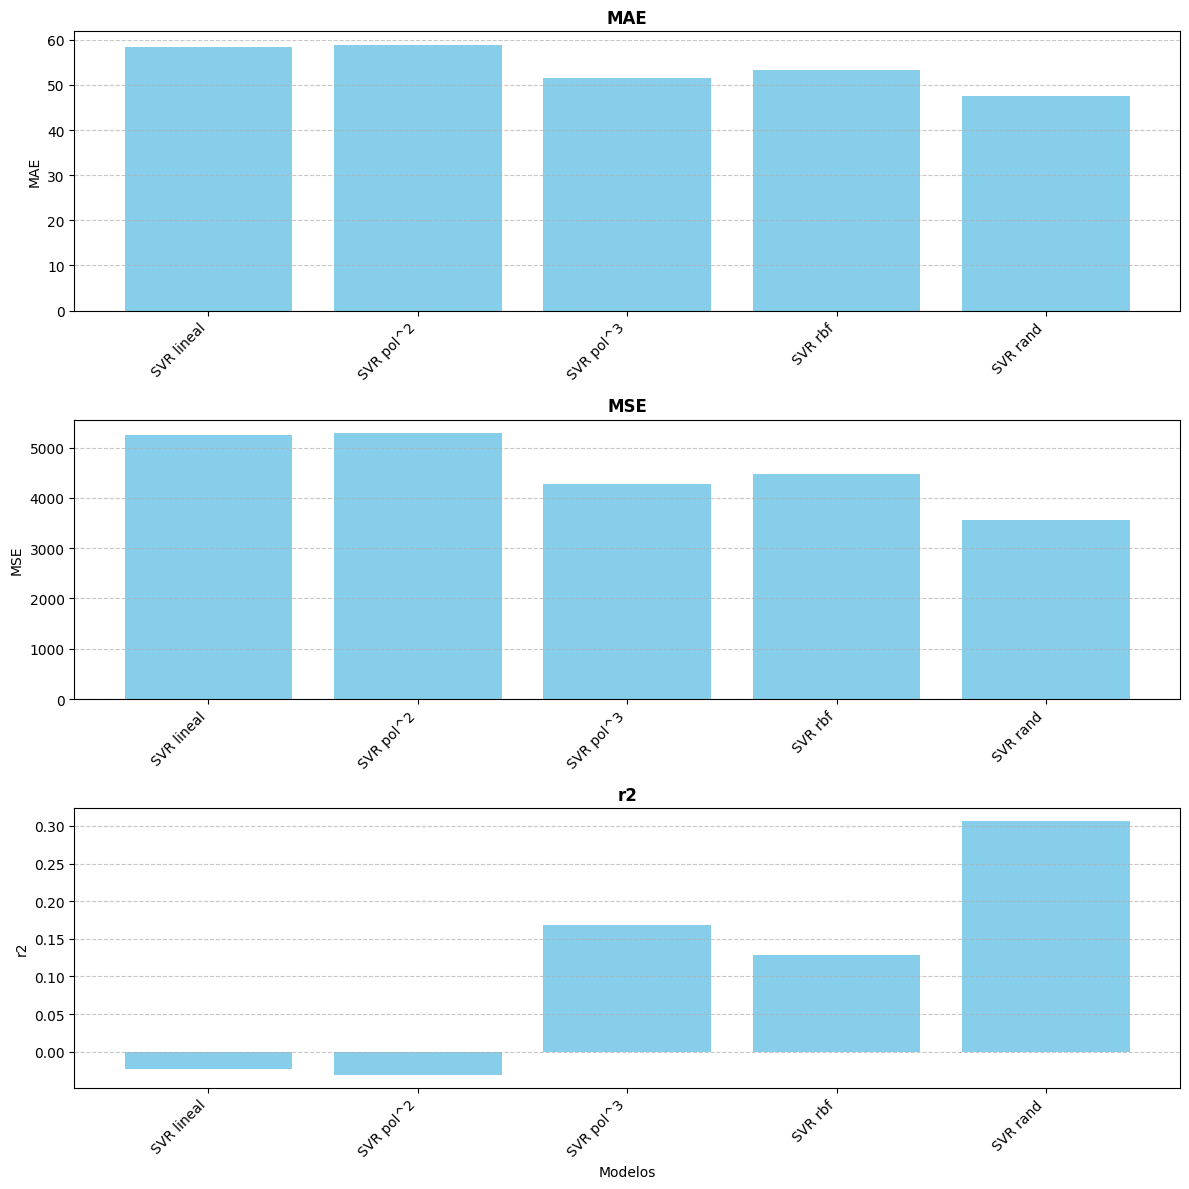

In [31]:
plt.figure(figsize=(12, 12))

for i, metric in enumerate(lst_metrics, 1):
    plt.subplot(3, 1, i)  # 3 filas, 1 columna, posición i
    plt.bar(df_met_model['model'], df_met_model[metric], color='skyblue')
    plt.title(metric, fontweight='bold')
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Modelos')
# Ajustar diseño para evitar solapamientos
plt.tight_layout()
plt.show()
